Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos
reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
número de vuelos reservados para cada grupo.

3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
niveles educativos.

In [58]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy import stats
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv ('files/flights.csv', index_col = 0)
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,salary
0,100018,2017,enero,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,married,aurora,7919.20,standard,2016,8,92552
1,100102,2017,enero,10,4,14,2030,203.0,0,0,ontario,toronto,m1r_4k3,male,college,single,nova,2887.74,standard,2013,3,79371
2,100140,2017,enero,6,0,6,1200,120.0,0,0,british_columbia,dawson_creek,u5i_4f1,female,college,divorced,nova,2838.07,standard,2016,7,79371
3,100214,2017,enero,0,0,0,0,0.0,0,0,british_columbia,vancouver,v5r_1w3,male,bachelor,married,star,4170.57,standard,2015,8,63253
4,100272,2017,enero,0,0,0,0,0.0,0,0,ontario,toronto,p1l_8x8,female,bachelor,divorced,star,6622.05,standard,2014,1,91163


## Análisis descriptivo 

Agrupamos los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
número de vuelos reservados para cada grupo.

In [60]:
#obtenemos los principales estadísticos utilizando el método .describe()
df['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,403760.000000
1,mean,4.134050
2,std,5.230064
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [61]:
#calculamos la cantidad de reservas total en función del nivel educativo. Vemos que es mayor en los que tienen un nivel educativo bachelor

df_educacion_reservas = df.groupby('education')['flights_booked'].sum().reset_index()
df_educacion_reservas

,education,flights_booked
0,bachelor,1038123
1,college,426398
2,doctor,74036
3,high_school_or_below,78993
4,master,51614


In [62]:
#sin embargo, también observamos que es el grupo donde encontramos mayor número de clientes, por lo tanto es lógico pensar que tengan más reservas de vuelos.
df_educacion_reservas = df.groupby('education')['loyalty_number'].count().reset_index()
df_educacion_reservas

,education,loyalty_number
0,bachelor,252567
1,college,102260
2,doctor,17731
3,high_school_or_below,18915
4,master,12287


Realizamos un análisis por nivel educativo para observar los distintos estadśiticos (media, mediana, percentiles, desviación típica...)

In [63]:
df_bachelor = df[df['education'] == 'bachelor']

In [64]:
df_bachelor['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,252567.000000
1,mean,4.110288
2,std,5.221671
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [65]:
df_college = df[df['education'] == 'college']

In [66]:
df_college['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,102260.000000
1,mean,4.169744
2,std,5.246040
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [67]:
df_doctor = df[df['education'] == 'doctor']

In [68]:
df_doctor['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,17731.000000
1,mean,4.175512
2,std,5.256971
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [69]:
df_high_school = df[df['education'] == 'high_school_or_below']

In [70]:
df_high_school['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,18915.000000
1,mean,4.176209
2,std,5.239267
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [71]:
df_master = df[df['education'] == 'master']

In [72]:
df_master['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,12287.000000
1,mean,4.200700
2,std,5.213956
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [73]:
df_reservas = df.groupby('education')['flights_booked'].mean().reset_index()
df_reservas

,education,flights_booked
0,bachelor,4.110288
1,college,4.169744
2,doctor,4.175512
3,high_school_or_below,4.176209
4,master,4.200700


In [74]:
df_mediana_reservas = df.groupby('education')['flights_booked'].median().reset_index()
df_mediana_reservas

,education,flights_booked
0,bachelor,1.0
1,college,1.0
2,doctor,1.0
3,high_school_or_below,1.0
4,master,1.0


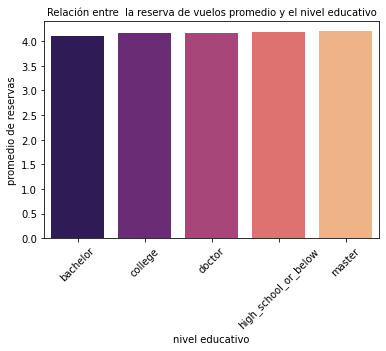

In [75]:
sns.barplot(x = "education", 
               y = "flights_booked", 
               data = df_reservas,
               palette = "magma")


plt.xlabel("nivel educativo")
plt.ylabel("promedio de reservas")
plt.xticks(rotation = 45)
plt.title("Relación entre  la reserva de vuelos promedio y el nivel educativo", fontsize = 10);

A simple vista, no parecen existir grandes diferencias en los promedios de reservas. Aunque sí se observa una gran diferencia entre media y mediana, lo que puede indicar la presencia de outliers, que modifiquen esa media. 

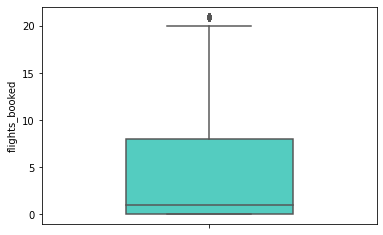

In [76]:
#creamos un boxplot para visualizar como se distribuye las reservas de vuelos. Efectivamente, comprovamos la presencia de outliers en la muestra. 

sns.boxplot(y = "flights_booked", 
            data = df, 
            width = 0.5, 
            color = "turquoise");

## Prueba estadística

#vamos a realizar un A/B testing, agrupando la muestra en dos grupos: 
- educación superior: bachelor, máster y doctorado
- educación básica: college, high_school_or_below

In [77]:
#hacemos una lambda y usando el método apply(), categorizamos los niveles de educación en dos grupos: superior y básica
df['education_cat'] = df['education'].apply(lambda x : 'superior' if x =='bachelor' or x == 'master' or x == 'doctor' else 'basica')


El siguiente paso es realizar el test estadístico correspondiente para evaluar si existen diferencias significativas entre los dos grupos. Primero, tenemos que ver si cumplen una serie de asunciones o supuestos, para elegir el más correcto: 

- Normalidad

- Homogeneidad de varianzas

- Independecia de las observaciones

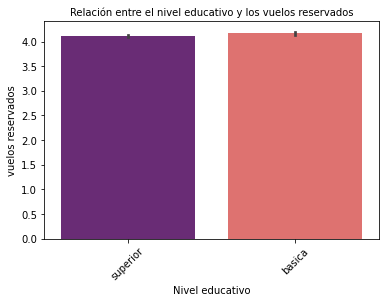

In [78]:
#realizamos un gráfico para visualizar como se distribuyen las reservas de vuelos en función del nivel educativo
sns.barplot(x = "education_cat", 
               y = "flights_booked", 
               data = df,
               palette = "magma")


plt.xlabel("Nivel educativo")
plt.ylabel("vuelos reservados")
plt.xticks(rotation = 45)
plt.title("Relación entre el nivel educativo y los vuelos reservados", fontsize = 10);

In [79]:
# a simple vista no parece haber mucha diferencia entre ambos grupos 

### Normalidad

- `p_value`: El valor p (p-value) asociado al test de Shapiro-Wilk, que indica cuán significativa es la desviación de la normalidad. Un valor p pequeño sugiere que los datos no siguen una distribución normal.

Para interpretar los resultados:

- Si el p-value > 0.05, lo que sugiere que los datos siguen una distribución normal.

- Si el p-value < 0.05, lo que sugiere que los datos no siguen una distribución normal.

In [80]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [81]:
normalidad (df, 'flights_booked')

Para la columna flights_booked los datos no siguen una distribución normal.


In [82]:
grupo_superiores = df[df['education_cat'] == 'superior']['flights_booked']
grupo_basicos = df[df['education_cat'] == 'basica']['flights_booked']

In [83]:
# como los datos no siguen una distribución normal, tenemos que utilizar una prueba no paramétrica
# Realizamos el test de Mann-Whitney U

stat, p_value = mannwhitneyu(grupo_superiores, grupo_basicos)

# Imprimir los resultados
print("Estadística de prueba U:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")




Estadística de prueba U: 17026171822.0
Valor p: 0.002942081262120518
Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.


## Anova

Utilizamos el test de varianza ANOVA cuando queremos comparar más de tres grupos diferentes, como en este caso (donde tenemos 5 niveles de educación)

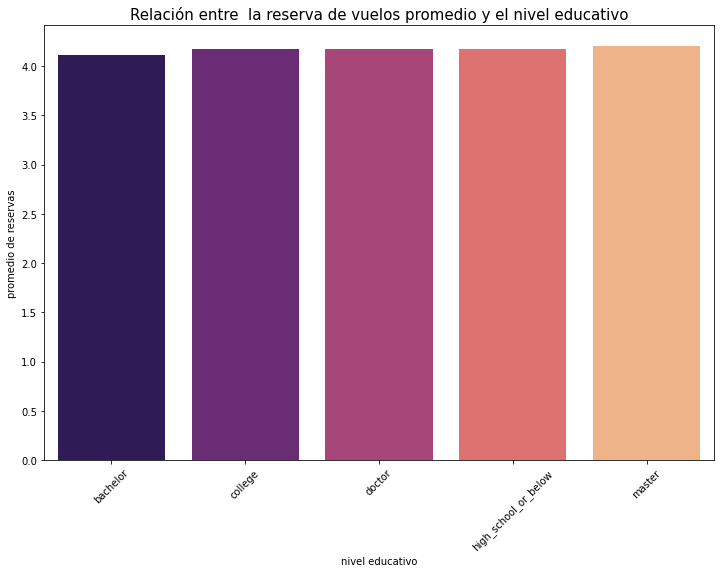

In [84]:
#realizamos un gráfico para visualizar como se distribuyen las reservas de vuelos en función del nivel educativo
plt.figure(figsize=(12, 8))

sns.barplot(x = "education", 
               y = "flights_booked", 
               data = df_reservas,
               palette = "magma")


plt.xlabel("nivel educativo")
plt.ylabel("promedio de reservas")
plt.xticks(rotation = 45)
plt.title("Relación entre  la reserva de vuelos promedio y el nivel educativo", fontsize = 15);

In [85]:
anova_resultado = f_oneway(df['flights_booked'][df['education'] == 'master'],
                            df['flights_booked'][df['education'] == 'doctor'],
                            df['flights_booked'][df['education'] == 'bachelor'],
                            df['flights_booked'][df['education'] == 'high_school_or_below'],
                            df['flights_booked'][df['education'] == 'college'])

# Imprimir resultados
print("Estadístico F:", anova_resultado.statistic)
print("Valor p:", anova_resultado.pvalue)

# Interpretar los resultados
alpha = 0.05
if anova_resultado.pvalue < alpha:
    print("Hay diferencias significativas en la reserva promedio de vuelos entre al menos dos grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas.   
          """)

else:
    print("No hay evidencia de diferencias significativas en la reserva promedio de vuelos entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          """)

Estadístico F: 3.57895773849834
Valor p: 0.00635298173601954
Hay diferencias significativas en la reserva promedio de vuelos entre al menos dos grupos.

 ---------- 


          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas.   
          
